# Part 2 : Histogram manipulation and equalisation

In this part of the TP, we are going to look at histogram equalisation. First, let us load the necessary packages and redefine some helper functions. Note that in this part of TP, you can use the plt.imshow function, since we are not interested in the aliasing effects which might occur.

In [220]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab= True

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

--2022-12-01 14:16:43--  https://perso.telecom-paristech.fr/anewson/doc/images/boat.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 2a04:8ec0:0:a::89c2:16e3, 137.194.22.227
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|2a04:8ec0:0:a::89c2:16e3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194963 (190K) [image/png]
Saving to: 'boat.png'

boat.png            100%[===================>] 190.39K  --.-KB/s    in 0.02s   

2022-12-01 14:16:43 (8.69 MB/s) - 'boat.png' saved [194963/194963]



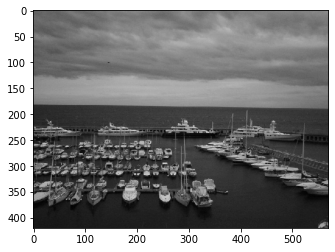

In [221]:
file_dir = 'images/'
file_name = 'boat'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boat.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

flat2 = img_gray.flatten()

As you can see, this image has pretty bad contrast : it is difficult to see in it. Now, display the histogram of this image to show this (you can use ```plt.hist```)

Text(0.5, 1.0, 'histogram')

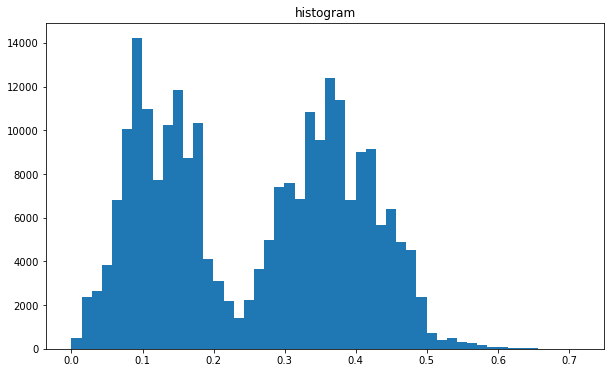

In [222]:
#INSERT CODE HERE
plt.figure(figsize=(10,6))
flat = img_gray.flatten()
plt.hist(flat, bins=50)
plt.title("histogram")

You will notice that the histogram is not very well spread out over the whole range of the image. We are going to correct this in this part of the TP, by imposing a __uniform histogram__ on the image.

Firstly, calculate the cumulative histogram $H$ of the image and display it (use the ```np.histogram``` and ```np.cumsum``` functions).

Text(0.5, 0, 'Intensity of pixel')

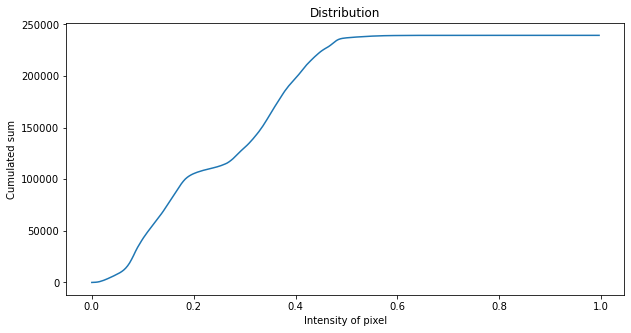

In [223]:
#INSERT CODE HERE
histogram, bin_edges = np.histogram(img_gray,bins=256, range=(0, 1))
cs = np.cumsum(histogram)


plt.figure(figsize=(10,5))
plt.plot(bin_edges[0:-1],cs)
plt.title("Distribution")
plt.ylabel("Cumulated sum")
plt.xlabel("Intensity of pixel")




## Histogram equalisation

Now, if we apply the cumulative histogram $H$ as a contrast change, then we are imposing a uniform histogram on the image (see the lesson slides). A contrast change means we do not change the order of the __values__ of the pixels. We are going to use $H$ as a type of lookup table to find the new values of the image.

In practice, this can be done with the following method :

- normalise the cumulative histogram such that the largest value is 1.0. This will map the final image to the interval $0, \dots, 1$
- convert the image grey-levels back to the interval $\{0, \dots 255\}$ as int values (use the n. This will allow us to use these values as indices in H
- apply the cumulative histogram to the values of the image pixels

Implement this algorithm now in a function ``equalize_histogram``. __Note__ In the ``np.histogram`` function, the histogram values have one less element than the histogram bins

In [224]:
def equalize_histogram(img_in, shape):
    #INSERT CODE HERE
    
    flat = (img_in.flatten() - img_in.flatten().min())*255
    flat = [round(x) for x in flat]
    hist, bin_edges = np.histogram(img_gray,bins=256, range=(0, 1))
    
    
    #normalization
    cs = np.cumsum(hist)
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cs = nj / N
    cs = cs.astype('uint8')
    
   
    img_equalise = cs[flat]
    img_equalise = np.reshape(img_equalise, img_in.shape)
    
    return   img_equalise

img_gray_equalise = equalize_histogram(img_gray, img_gray.shape)


We carry out the algorithm on the input image and display the image. Is the result better ?

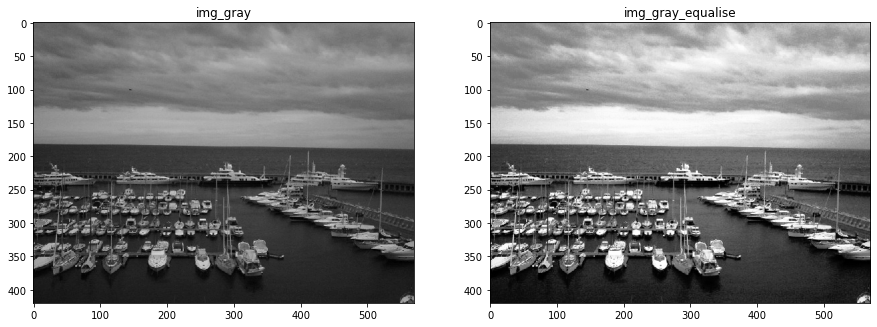

In [225]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("img_gray")

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_gray_equalise, cmap='gray')
plt.title("img_gray_equalise")

plt.show(block=True)

Now, display both the histogram and cumulative histogram of the equalised image

Text(0.5, 0, 'Intensity of pixel')

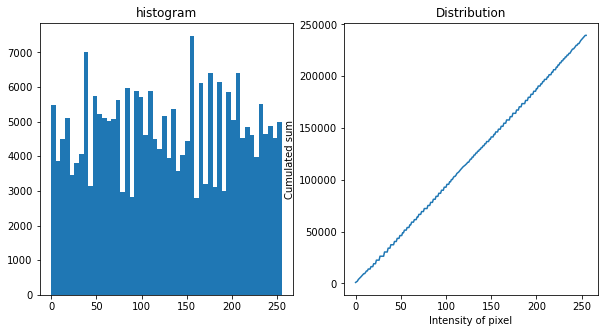

In [226]:
#INSERT CODE HERE
histogram, bin_edges = np.histogram(img_gray_equalise,bins=256, range=(0, 256))
cs = np.cumsum(histogram)


fig = plt.figure(figsize =(10,5))
fig.add_subplot(1,2,1)
flat = img_gray_equalise.flatten()
plt.hist(flat, bins=50)
plt.title("histogram")


fig.add_subplot(1,2,2)
plt.plot(bin_edges[0:-1],cs)
plt.title("Distribution")
plt.ylabel("Cumulated sum")
plt.xlabel("Intensity of pixel")



__Question 2.1__ Is the histogram of the equalised image perfectly uniform (flat) ? Why is this the case ?

__Answer__ Nous nous voyons que l'image a été égalisé parfaitement. 
- On the first plot we see that each pixel intensity is represented more uniformly, where before dark and very light pixels were non-existent now they are in almost equal proportions to the rest.
- This is confirmed by the second plot, the cumulative histogram is almost perfectly linear (there are still some small oscillations). The intensity of each pixel is represented in a uniform way.

### Colour images

Let us try to apply our algorithm to a colour image. First, let's read the image and display it

--2022-12-01 14:16:45--  https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 2a04:8ec0:0:a::89c2:16e3, 137.194.22.227
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|2a04:8ec0:0:a::89c2:16e3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501758 (1.4M) [image/png]
Saving to: 'alps_contrast.png'

alps_contrast.png   100%[===================>]   1.43M  3.09MB/s    in 0.5s    

2022-12-01 14:16:46 (3.09 MB/s) - 'alps_contrast.png' saved [1501758/1501758]



(761, 1142, 3)

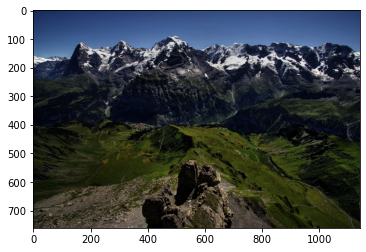

In [227]:
file_dir = 'images/'
file_name = 'alps_contrast'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png"
  _,img_color = read_image(file_name+file_ext)
else:
  _,img_color = read_image(file_dir+file_name+file_ext)

display_image(img_color)
img_color.shape

In [228]:
def equalize_histogram3(img_gray):
    #INSERT CODE HERE
    flat =img_gray.flatten()
    hist, bin_edges = np.histogram(img_gray,bins=256, range=(0, 256))
    
    cs3 = np.cumsum(hist)
    nj = (cs - cs.min()) * 255
    N = cs3.max() - cs3.min()
    cs3 = nj / N
    cs3 = cs3.astype('uint8')
    
    img_new = cs3[flat]
    img_equalise = np.reshape(img_new, img_gray.shape)
    
    return   img_equalise

Now, create a function ``equalize_histogram_color`` which uses your grey-level function to carry out colour histogram equalisation in each colour channel independently, and display the output image. Careful to

- normalise the input range to $0, \dots, 1$ for each channel when processing it
- put the output range back to $0, \dots, 255$ when displaying.

To view the result better, you can write it to a file.

In [229]:
def equalize_histogram_color(img_color):
    r = equalize_histogram3(img_color[:,:,0])
    g = equalize_histogram3(img_color[:,:,1])
    b  = equalize_histogram3(img_color[:,:,2])
    img_color_equalized = np.dstack((r,g,b))
    
    return img_color_equalized


img_color_equalized = equalize_histogram_color(img_color)
write_image(img_color_equalized,file_name+'_equalised.png')

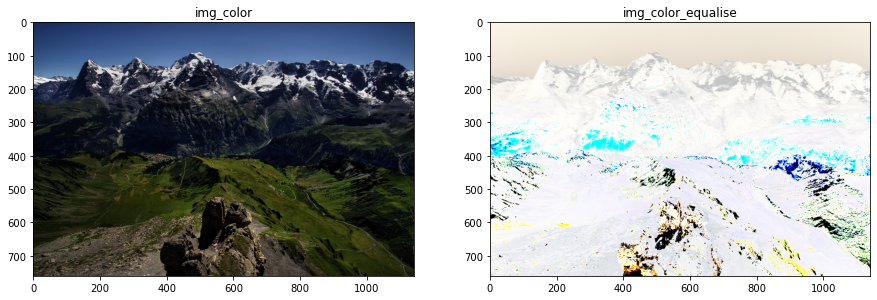

In [230]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img_color)
plt.title("img_color")

# display the new image
fig.add_subplot(1,2,2)
display_image(255.0 * img_color_equalized)
plt.title("img_color_equalise")

plt.show(block=True)

__Question 1.2__ Do you think this result looks right ? What may be wrong in our approach ? What could be a solution to this ?

__Answer__ 
- The result is not convincing. The problem with this approach is that we equalize each pixel separately, and not the whole set of pixels. So each pixel follows the distribution of its own pixel but not the distribution of all pixels. 
- One solution would be to convert the image to Grayscale, equalize the image, and then convert the equalized image back to RGB. Thus the equalization would be done on all channels.